In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('wine.csv')
X = dataset.iloc[:, 1:].values  # Ознаки
y = dataset.iloc[:, 0].values   # Мітки класів

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Оцінка точності
cm_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
print(cm_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]
Decision Tree Accuracy: 0.94


In [6]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Оцінка точності
cm_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Confusion Matrix:")
print(cm_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Random Forest Accuracy: 1.00



Explained Variance Ratio:
[0.35900066 0.18691934 0.11606557 0.07371716 0.0665386  0.04854582
 0.04195042 0.02683922 0.0234746  0.01889734 0.01715943 0.01262928
 0.00826257]


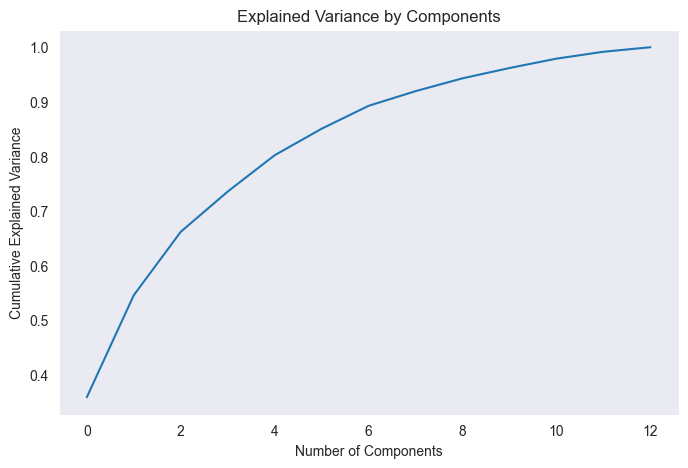

In [7]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:")
print(explained_variance)

# Візуалізація кумулятивної дисперсії
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid()
plt.show()

In [8]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Навчання моделі на PCA даних
rf_pca = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)

# Оцінка точності
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"\nAccuracy with PCA (2 components): {accuracy_pca:.2f}")


Accuracy with PCA (2 components): 1.00


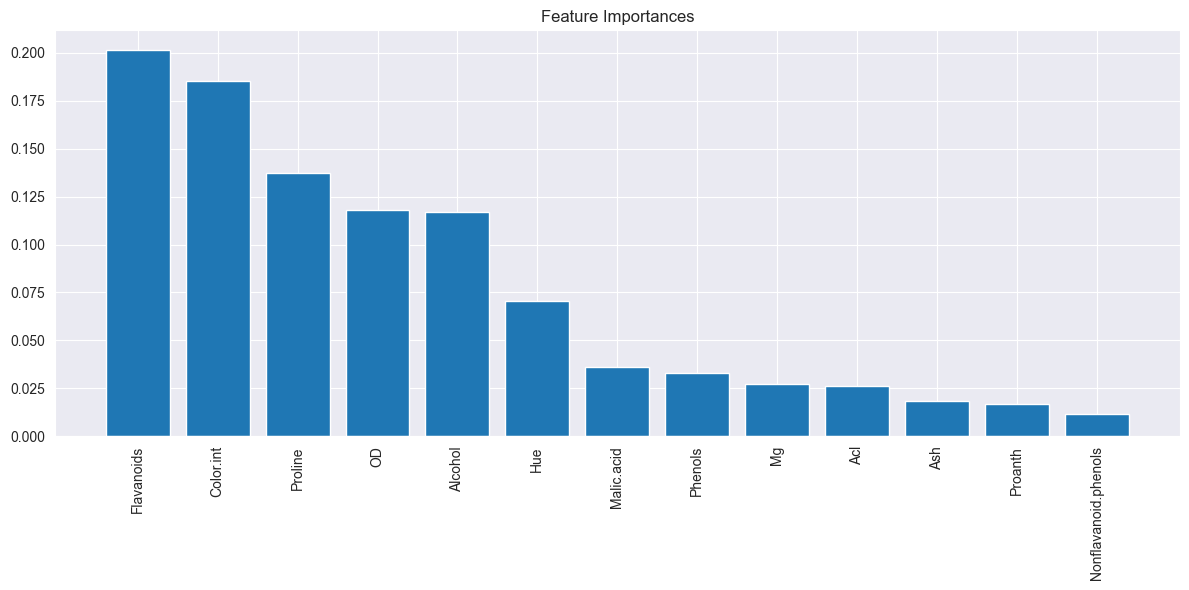

In [9]:
importances = rf_classifier.feature_importances_
features = dataset.columns[1:]
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()